In [14]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

# Double Well Potential

Construimos un potencial del tipo doble pozo con la siguiente expresión:

\begin{equation}
f(x)=E_{0}*\left[ \left(\frac{x}{c}\right)^4 -2\left(\frac{x}{c}\right)^2 \right]-\frac{m}{c}x
\end{equation}

In [1]:
def double_well(x,Eo,c,m):
    return Eo*((x/c)**4-2*(x/c)**2)-(m/c)*x

Veamos qué significan las constantes $E_{0}$, $m$ y $c$.

## Symmetric case ($m=0$)

El caso del doble pozo simétrico en una dimensión lo encontramos cuando $m=0$. En esta situación, los mínimos del doble pozo se encuentran situados en $x=-c$ y $x=c$. Y $E_{0}$ es el valor de la diferencia en energía entre los mínimos y el máximo de la barrera. Como puedes ver en el siguiente ejemplo:

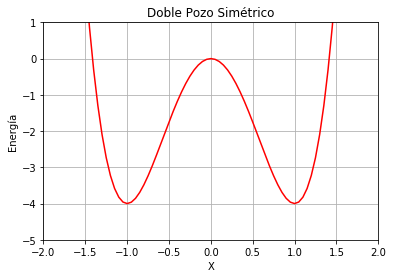

In [79]:
Eo=4.0 # altura de la barrera en el caso del pozo simétrico
c=1.0 # Valor absoluto de la posición de los mínimos en el eje X
m=0.0

x_serie = np.arange(-5., 5., 0.05)

plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.ylim(-5,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X")
plt.ylabel("Energía")
plt.title("Doble Pozo Simétrico")
plt.show()

Puedes jugar con los valores de las constantes $E_{0}$ y $c$ para comprobar que la descripción hecha anteriormente es consistente. O puedes recurrir a la primera derivada del potencial para comprobar analíticamente que esto es correcto.

In [80]:
x, Eo, c = sy.symbols('x Eo c')
f = Eo*((x/c)**4-2*(x/c)**2)

g=sy.diff(f,x) # Primera derivada con respecto a x de la funcion f

Vemos, en la factorización de la primera derivada que hay raices $x=0$, la posición de la barrera, y $x=c$ y $x=-c$, para la posición de los mínimos.

In [81]:
sy.factor(g)

4*Eo*x*(-c + x)*(c + x)/c**4

Podemos ahora calcular la diferencia de altura del doble pozo entre el tope de la barrera y los mínimos:

\begin{equation}
f(0)-f(c)=0-E_{0}*\left[ 1-2 \right]=E_{0}
\end{equation}

### Frecuencia de pequeñas oscilaciones en los mínimos
Entendido al papel de las constantes $E_{0}$ y $c$ en el caso del doble pozo simétrico, nos interesa también caracterizar la frecuencia de las pequeñas oscilaciones en torno a los mínimos. Conocemos que el valor de la segunda derivada de la función en los mínimos es igual a la constante del potencial armónico aproximado al mínimo.

In [82]:
x, Eo, c = sy.symbols('x Eo c')
f = Eo*((x/c)**4-2*(x/c)**2)

gg=sy.diff(f,x,x) # Primera derivada con respecto a x de la funcion f

In [83]:
gg.subs({x:c})

8*Eo/c**2

Veamos gráficamente el ajuste:

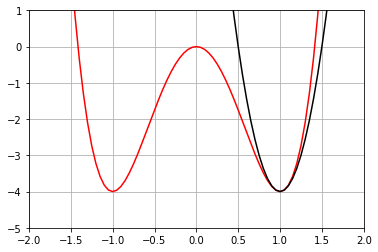

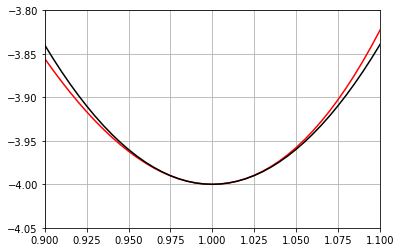

In [84]:
def harmonic_well(x,k,c,Eo):
    return 0.5*k*(x-c)**2-Eo

Eo=4.0
c=1.0
m=0.0
k=(8*Eo)/c**2

x_serie = np.arange(-5., 5., 0.05)

plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.plot(x_serie, harmonic_well(x_serie,k,c,Eo), 'k-')
plt.ylim(-5,1)
plt.xlim(-2,2)
plt.grid()
plt.show()

x_serie = np.arange(-0.5, 1.5, 0.005)
plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.plot(x_serie, harmonic_well(x_serie,k,c,Eo), 'k-')
plt.ylim(-4.05,-3.8)
plt.xlim(0.9,1.1)
plt.grid()
plt.show()

## Assymetric case ($m\neq0$)

Para el caso asimétrico interpretaremos que los valores de las constantes $E_{0}$ y $m$ tiene **aproximadamente** la misma interpretación, y que el valor de $m$ será la cantidad de energía que **aproximadamente** uno de los pozos sube mientras el otro la baja. En este caso tenemos entonces una barrera de energía con valores distintos de altura según sea el pozo de la izquierda -alto- o el de la derecha -bajo-.

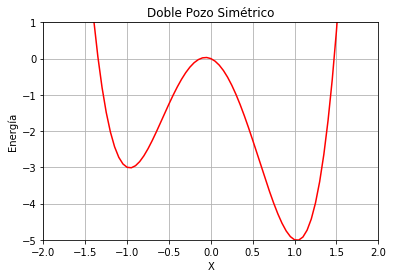

In [88]:
Eo=4.0 # altura de la barrera en el caso del pozo simétrico
c=1.0 # Valor absoluto de la posición de los mínimos en el eje X
m=1.0

x_serie = np.arange(-5., 5., 0.05)

plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.ylim(-5,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X")
plt.ylabel("Energía")
plt.title("Doble Pozo Simétrico")
plt.show()

Efectivamente vemos que el pozo de la izquierda tiene aproximadamente una diferencia del valor de la energía con respecto a la cumbre de la barrera de **aproximadamente** $E_{0}-m$, mientras que el pozo de la derecha ha aumentado dicho valor a **aproximadamente** $E_{0}+m$.

### Frecuencia de pequeñas oscilaciones en los mínimos
Dado que $m$ sólo introduce un factor lineal que desaparece en la segunda derivada, la aproximación harmónica de potencial hecha para el caso del doble pozo simétrico sigue siendo válida.